# Project  - cafe를 중심으로 데이터 분석

In [54]:
##### import 영역

In [55]:
import pandas as pd

In [56]:
import numpy as np

In [57]:
import pymysql.cursors

In [58]:
# report which features were selected by RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR

In [59]:
import matplotlib.pyplot as plt

In [60]:
import seaborn as sns

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
from PIL import Image

In [63]:
from wordcloud import WordCloud
from collections import Counter

In [122]:
from pandas_profiling import profile_report

##################################################################################

In [64]:
result_dataset=pd.read_excel('./cafe_pop_fin_dup_apt_nan.xlsx')

In [125]:
# cafe_apt_pop_2.profile_report()

--------------------------------------------------------------

## 0. pandas로 merge

In [65]:
apt=pd.read_excel('./apart_average.xlsx')
pop=pd.read_excel('./pop_average_7gu.xlsx')
cafe=pd.read_csv('./cafe_total_0715_bus_subway2.csv',encoding='ansi')

##### ---- cafe   ,  apt merge

In [66]:
cafe_apt=pd.merge(cafe, apt, how='left', on=['dong','year'])

In [67]:
# pop.groupby('dong').agg({'year':np.size,'pop_avg':np.mean})

##### -----nulll 값 제거

In [68]:
cafe_apt=cafe_apt.dropna(axis=0)

In [69]:
cafe_apt.columns

Index(['code', 'cafe_nm', 'gu_cd', 'gu_x', 'dong_cd', 'dong', 'gibun', 'road',
       'lng', 'lat', 'year', 'bus_cnt', 'HubName', 'HubDist', 'gu_num', 'gu_y',
       'size', 'trade', 'sizetrade', 'average_sizetrade'],
      dtype='object')

##### ------중복값 제거

In [70]:
cafe_apt= cafe_apt.drop_duplicates(subset=['code', 'cafe_nm', 'gu_cd', 'gu_x', 'dong_cd', 'dong', 'gibun', 'road',
       'lng', 'lat', 'year', 'bus_cnt', 'HubName', 'HubDist'])

##### ---- cafe   ,  apt   , pop merge

In [71]:
cafe_apt_pop = pd.merge(cafe_apt, pop, how='left', on=['dong','year'])

##### -----nulll 값 제거

In [72]:
cafe_apt_pop=cafe_apt_pop.dropna(axis=0)

In [73]:
cafe_apt_pop.columns

Index(['code', 'cafe_nm', 'gu_cd', 'gu_x', 'dong_cd', 'dong', 'gibun',
       'road_x', 'lng', 'lat', 'year', 'bus_cnt', 'HubName', 'HubDist',
       'gu_num', 'gu_y', 'size', 'trade', 'sizetrade', 'average_sizetrade',
       'road_y', 'pop', 'gu', 'pop_avg'],
      dtype='object')

##### ------중복값 제거

In [74]:
cafe_apt_pop=cafe_apt_pop.drop_duplicates(subset=['code', 'cafe_nm', 'gu_cd', 'gu_x', 'dong_cd', 'dong', 'gibun',
       'road_x', 'lng', 'lat', 'year', 'bus_cnt', 'HubName', 'HubDist'])

##### ---- index 초기화

In [75]:
cafe_apt_pop.reset_index(drop=True, inplace=True)

##### 결측값 처리

In [76]:
# imputer = SimpleImputer(strategy='mean')

# # fit on the dataset
# imputer.fit(X)

# # transform the dataset
# Xtrans = imputer.transform(X)

---------------------------------------------------pd.read_excel('./apart_average.xlsx')

## 0. SQL join

In [77]:
#### sql문 사용시 그냥 df5 사용하면된다.

In [78]:
sql4 = 'select c.code, c.cafe_nm, c.gu_cd, c.gu, c.dong_cd, c.dong, c.gibun, c.road, \
       c.lng, c.lat, c.year, c.bus_cnt, c.HubName, c.HubDist, p.pop_avg \
from cafe_total_0715_bus_subway2 as c \
left join pop_average_7gu as p \
on (c.dong = p.dong and c.year=p.year) \
join apart_average as a \
on (c.dong = a.dong and c.year = a.year) \
;'

In [79]:
sql5 = 'select distinct c.code, c.cafe_nm, c.gu_cd, c.gu, c.dong_cd, c.dong, c.gibun, c.road, \
       c.lng, c.lat, c.year, c.bus_cnt, c.HubName, c.HubDist, p.pop_avg \
from cafe_total_0715_bus_subway2 as c \
left join pop_average_7gu as p \
on (c.dong = p.dong and c.year=p.year) \
join apart_average as a \
on (c.dong = a.dong and c.year = a.year) \
;'

In [80]:
conn = pymysql.connect(host='localhost',
        user='root',
        password='1234',
        db='projectt',
        charset='utf8',
        cursorclass=pymysql.cursors.DictCursor)
try:
    with conn.cursor() as curs:
        curs.execute(sql4)
        rs4 = curs.fetchall()
        curs.execute(sql5)
        rs5 = curs.fetchall()
# DB에서 받아온 값을 DataFrame에 넣음

        df4= pd.DataFrame(rs4)
        df5 = pd.DataFrame(rs5)
#         print(df)
finally:
   conn.close()

In [81]:
a=df4.dropna(axis=0)

In [82]:
df4.drop_duplicates(subset=['code', 'cafe_nm', 'gu_cd', 'gu', 'dong_cd', 'dong', 'gibun', 'road',
       'lng', 'lat', 'year', 'bus_cnt', 'HubName', 'HubDist', 'pop_avg'],inplace=True)

In [83]:
#### df5  바로 앤코딩 시작하면 됨.

-------------------------------------

## 1. encoding

#### -- 카페 encoding

In [84]:
cafe_apt_pop['cafe_cd'] = 0

In [85]:
cafe_apt_pop.head(1)

,code,cafe_nm,gu_cd,gu_x,dong_cd,dong,gibun,road_x,lng,lat,...,gu_y,size,trade,sizetrade,average_sizetrade,road_y,pop,gu,pop_avg,cafe_cd
0,20288646,스타벅스,11680,강남구,1168010500,삼성동,서울특별시 강남구 삼성동 168-26,서울특별시 강남구 테헤란로103길,127.063878,37.510038,...,강남구,36.0,36000.0,1000.0,1773.421078,학동로56길,2836411.0,강남구,1542359.75,0


In [86]:
uniCafe = ['COFFEEBEAN영동2교사거리점','PaulBassett','STARBUCKSCOFFEE']

In [87]:
for nm in uniCafe:
    ind = cafe_apt_pop[cafe_apt_pop['cafe_nm']==nm].index
    for i in ind:
        cafe_apt_pop.iloc[i,-1]=1

In [88]:
for i in range(len(cafe_apt_pop.index)):
    st= cafe_apt_pop['cafe_nm'][i].find('스타벅스')
    if st != -1:
        cafe_apt_pop['cafe_cd'][i] = 1
    pal= cafe_apt_pop['cafe_nm'][i].find('폴바')
    if pal != -1:
        cafe_apt_pop['cafe_cd'][i] = 1
    cofB= cafe_apt_pop['cafe_nm'][i].find('커피빈')
    if cofB != -1:
        cafe_apt_pop['cafe_cd'][i] = 1

C:\Users\admin\anaconda3\envs\multi\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\admin\anaconda3\envs\multi\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\admin\anaconda3\envs\multi\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

#### --- 구 encoding

In [89]:
cafe_apt_pop['gu_cd'] = 0

In [90]:
for i in cafe_apt_pop.index:
    gu = cafe_apt_pop.loc[i,'gu']
    if gu in ['강남구','서초구','송파구']:
        cafe_apt_pop.loc[i,'gu_cd'] = 1

-----------------------------------------------------------------

## 2. 데이터 전처리

In [91]:
cafe_apt_pop_2 = cafe_apt_pop.drop(columns=['code', 'cafe_nm','gu_x','dong', 'gibun',
       'road_x','HubName','gu_num', 'gu_y', 'size', 'trade', 'sizetrade', 'road_y', 'pop', 'gu'])

In [92]:
cafe_apt_pop_2.rename(columns={'average_sizetrade':'sizetrade'},inplace=True)

In [93]:
# min
trans = MinMaxScaler()
X_norm =trans.fit_transform(cafe_apt_pop_2)
df_norm = pd.DataFrame(X_norm,columns=cafe_apt_pop_2.columns)
df_norm.corr()

,gu_cd,dong_cd,lng,lat,year,bus_cnt,HubDist,sizetrade,pop_avg,cafe_cd
gu_cd,1.000000,0.986451,0.030066,-0.950762,-0.070691,-0.194285,-0.024460,0.618822,-0.195246,0.410078
dong_cd,0.986451,1.000000,0.167211,-0.921253,-0.065688,-0.246738,-0.045151,0.596668,-0.144723,0.392679
lng,0.030066,0.167211,1.000000,-0.010159,0.023329,-0.301755,-0.047341,-0.063409,0.195912,-0.077246
lat,-0.950762,-0.921253,-0.010159,1.000000,0.073785,0.125999,0.042137,-0.578538,0.211093,-0.393615
year,-0.070691,-0.065688,0.023329,0.073785,1.000000,0.000038,0.001400,0.227946,0.682502,-0.137963
bus_cnt,-0.194285,-0.246738,-0.301755,0.125999,0.000038,1.000000,0.093721,-0.181174,-0.072909,0.023447
HubDist,-0.024460,-0.045151,-0.047341,0.042137,0.001400,0.093721,1.000000,0.059567,-0.011091,-0.014136
sizetrade,0.618822,0.596668,-0.063409,-0.578538,0.227946,-0.181174,0.059567,1.000000,0.178596,0.265115
pop_avg,-0.195246,-0.144723,0.195912,0.211093,0.682502,-0.072909,-0.011091,0.178596,1.000000,-0.159713
cafe_cd,0.410078,0.392679,-0.077246,-0.393615,-0.137963,0.023447,-0.014136,0.265115,-0.159713,1.000000


In [94]:
# std
sc = StandardScaler()
df_sc_total = sc.fit_transform(cafe_apt_pop_2)
df_trans_sc_total = pd.DataFrame(df_sc_total, columns=cafe_apt_pop_2.columns)
df_trans_sc_total.corr()

,gu_cd,dong_cd,lng,lat,year,bus_cnt,HubDist,sizetrade,pop_avg,cafe_cd
gu_cd,1.000000,0.986451,0.030066,-0.950762,-0.070691,-0.194285,-0.024460,0.618822,-0.195246,0.410078
dong_cd,0.986451,1.000000,0.167211,-0.921253,-0.065688,-0.246738,-0.045151,0.596668,-0.144723,0.392679
lng,0.030066,0.167211,1.000000,-0.010159,0.023329,-0.301755,-0.047341,-0.063409,0.195912,-0.077246
lat,-0.950762,-0.921253,-0.010159,1.000000,0.073785,0.125999,0.042137,-0.578538,0.211093,-0.393615
year,-0.070691,-0.065688,0.023329,0.073785,1.000000,0.000038,0.001400,0.227946,0.682502,-0.137963
bus_cnt,-0.194285,-0.246738,-0.301755,0.125999,0.000038,1.000000,0.093721,-0.181174,-0.072909,0.023447
HubDist,-0.024460,-0.045151,-0.047341,0.042137,0.001400,0.093721,1.000000,0.059567,-0.011091,-0.014136
sizetrade,0.618822,0.596668,-0.063409,-0.578538,0.227946,-0.181174,0.059567,1.000000,0.178596,0.265115
pop_avg,-0.195246,-0.144723,0.195912,0.211093,0.682502,-0.072909,-0.011091,0.178596,1.000000,-0.159713
cafe_cd,0.410078,0.392679,-0.077246,-0.393615,-0.137963,0.023447,-0.014136,0.265115,-0.159713,1.000000


In [95]:
# min - std
trans = MinMaxScaler()
X_norm =trans.fit_transform(cafe_apt_pop_2)
df_norm = pd.DataFrame(X_norm,columns=cafe_apt_pop_2.columns)
sc = StandardScaler()
df_sc_total = sc.fit_transform(df_norm)
df_trans_sc_total = pd.DataFrame(df_sc_total, columns=cafe_apt_pop_2.columns)
df_trans_sc_total.corr()#.round(5)

,gu_cd,dong_cd,lng,lat,year,bus_cnt,HubDist,sizetrade,pop_avg,cafe_cd
gu_cd,1.000000,0.986451,0.030066,-0.950762,-0.070691,-0.194285,-0.024460,0.618822,-0.195246,0.410078
dong_cd,0.986451,1.000000,0.167211,-0.921253,-0.065688,-0.246738,-0.045151,0.596668,-0.144723,0.392679
lng,0.030066,0.167211,1.000000,-0.010159,0.023329,-0.301755,-0.047341,-0.063409,0.195912,-0.077246
lat,-0.950762,-0.921253,-0.010159,1.000000,0.073785,0.125999,0.042137,-0.578538,0.211093,-0.393615
year,-0.070691,-0.065688,0.023329,0.073785,1.000000,0.000038,0.001400,0.227946,0.682502,-0.137963
bus_cnt,-0.194285,-0.246738,-0.301755,0.125999,0.000038,1.000000,0.093721,-0.181174,-0.072909,0.023447
HubDist,-0.024460,-0.045151,-0.047341,0.042137,0.001400,0.093721,1.000000,0.059567,-0.011091,-0.014136
sizetrade,0.618822,0.596668,-0.063409,-0.578538,0.227946,-0.181174,0.059567,1.000000,0.178596,0.265115
pop_avg,-0.195246,-0.144723,0.195912,0.211093,0.682502,-0.072909,-0.011091,0.178596,1.000000,-0.159713
cafe_cd,0.410078,0.392679,-0.077246,-0.393615,-0.137963,0.023447,-0.014136,0.265115,-0.159713,1.000000


In [96]:
# std - min
sc = StandardScaler()
df_sc_total = sc.fit_transform(cafe_apt_pop_2)
df_trans_sc_total = pd.DataFrame(df_sc_total, columns=cafe_apt_pop_2.columns)
trans = MinMaxScaler()
X_norm =trans.fit_transform(df_trans_sc_total)
df_norm = pd.DataFrame(X_norm,columns=cafe_apt_pop_2.columns)
df_norm.corr()

,gu_cd,dong_cd,lng,lat,year,bus_cnt,HubDist,sizetrade,pop_avg,cafe_cd
gu_cd,1.000000,0.986451,0.030066,-0.950762,-0.070691,-0.194285,-0.024460,0.618822,-0.195246,0.410078
dong_cd,0.986451,1.000000,0.167211,-0.921253,-0.065688,-0.246738,-0.045151,0.596668,-0.144723,0.392679
lng,0.030066,0.167211,1.000000,-0.010159,0.023329,-0.301755,-0.047341,-0.063409,0.195912,-0.077246
lat,-0.950762,-0.921253,-0.010159,1.000000,0.073785,0.125999,0.042137,-0.578538,0.211093,-0.393615
year,-0.070691,-0.065688,0.023329,0.073785,1.000000,0.000038,0.001400,0.227946,0.682502,-0.137963
bus_cnt,-0.194285,-0.246738,-0.301755,0.125999,0.000038,1.000000,0.093721,-0.181174,-0.072909,0.023447
HubDist,-0.024460,-0.045151,-0.047341,0.042137,0.001400,0.093721,1.000000,0.059567,-0.011091,-0.014136
sizetrade,0.618822,0.596668,-0.063409,-0.578538,0.227946,-0.181174,0.059567,1.000000,0.178596,0.265115
pop_avg,-0.195246,-0.144723,0.195912,0.211093,0.682502,-0.072909,-0.011091,0.178596,1.000000,-0.159713
cafe_cd,0.410078,0.392679,-0.077246,-0.393615,-0.137963,0.023447,-0.014136,0.265115,-0.159713,1.000000


### rfe

#### - **전체 데이터**

In [97]:
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=1)
y= cafe_apt_pop_2['cafe_cd']  # 0, 1
X = cafe_apt_pop_2.drop(columns=['cafe_cd'])
# fit RFE
rfe.fit(X, y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=1)

In [98]:
# summarize all features
for i in range(X.shape[1]):
  print('Column: %d, Selected=%s, Rank: %d,  %s' % (i, rfe.support_[i], rfe.ranking_[i], X.columns[i]))

Column: 0, Selected=False, Rank: 9,  gu_cd
Column: 1, Selected=False, Rank: 6,  dong_cd
Column: 2, Selected=False, Rank: 2,  lng
Column: 3, Selected=True, Rank: 1,  lat
Column: 4, Selected=False, Rank: 8,  year
Column: 5, Selected=False, Rank: 4,  bus_cnt
Column: 6, Selected=False, Rank: 3,  HubDist
Column: 7, Selected=False, Rank: 5,  sizetrade
Column: 8, Selected=False, Rank: 7,  pop_avg


#### - **표준화 정규화 후**

In [99]:
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=1)
y= df_norm['cafe_cd']  # 0, 1
X = df_norm.drop(columns=['cafe_cd'])
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
  print('Column: %d, Selected=%s, Rank: %d,  %s' % (i, rfe.support_[i], rfe.ranking_[i], X.columns[i]))

Column: 0, Selected=False, Rank: 9,  gu_cd
Column: 1, Selected=False, Rank: 6,  dong_cd
Column: 2, Selected=False, Rank: 2,  lng
Column: 3, Selected=True, Rank: 1,  lat
Column: 4, Selected=False, Rank: 8,  year
Column: 5, Selected=False, Rank: 4,  bus_cnt
Column: 6, Selected=False, Rank: 3,  HubDist
Column: 7, Selected=False, Rank: 5,  sizetrade
Column: 8, Selected=False, Rank: 7,  pop_avg


### - **이상치 제거**

In [100]:
df4.head(1)

,code,cafe_nm,gu_cd,gu,dong_cd,dong,gibun,road,lng,lat,year,bus_cnt,HubName,HubDist,pop_avg
0,20288646,스타벅스,11680,강남구,1168010500,삼성동,서울특별시 강남구 삼성동 168-26,서울특별시 강남구 테헤란로103길,127.063878,37.510038,2018,4,봉은사역,528.714216,1542359.75


In [101]:
def outliers_iqr(data):
#     for i in data.columns:
#         data1 = data.iloc[:,i]
    q1, q3 = np.percentile(data,[25,75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
#     print(i)
    return np.where((data > upper_bound)| (data < lower_bound))

## 3. 시각화

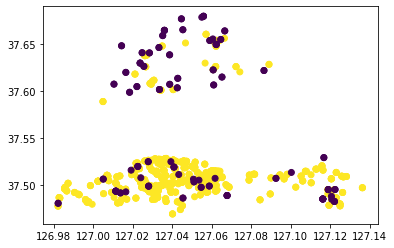

In [102]:
plt.scatter(cafe_apt_pop_2['lng'],cafe_apt_pop_2['lat'], c=cafe_apt_pop_2['cafe_cd'])
plt.show()

<AxesSubplot:xlabel='gu_cd', ylabel='count'>

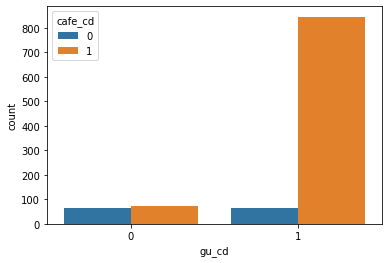

In [103]:
sns.countplot(data=cafe_apt_pop_2,x='gu_cd',hue='cafe_cd')

sns.lmplot( x = 'gu_cd', y = 'lat', data = cafe_apt_pop_2, hue = 'cafe_cd', markers = ['o', 'v'] )

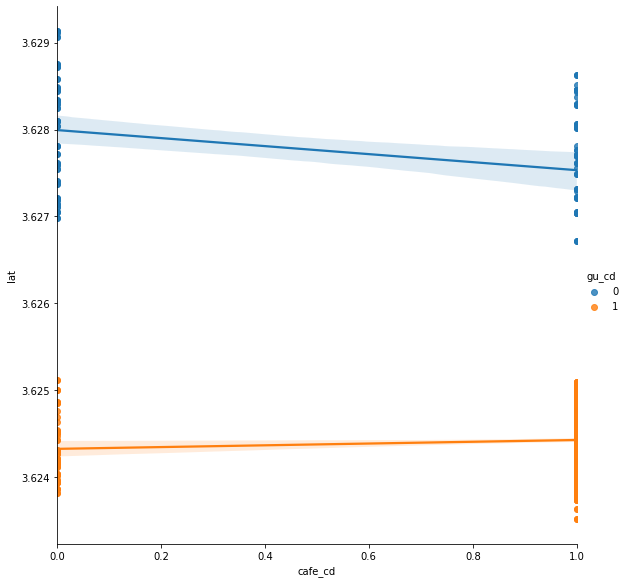

In [116]:
sns.lmplot(x="cafe_cd", y="lat", hue='gu_cd',height=8, data=cafe_apt_pop_2)
plt.show()

In [121]:
df4.corr()

,code,gu_cd,dong_cd,lng,lat,year,bus_cnt,HubDist,pop_avg
code,1.000000,0.108837,0.108786,-0.113264,-0.090079,-0.013608,0.031289,-0.072940,-0.031862
gu_cd,0.108837,1.000000,1.000000,0.189192,-0.921551,-0.067374,-0.227388,-0.047167,-0.144695
dong_cd,0.108786,1.000000,1.000000,0.189199,-0.921555,-0.067379,-0.227391,-0.047172,-0.144723
lng,-0.113264,0.189192,0.189199,1.000000,-0.044818,0.018142,-0.239388,0.043143,0.195912
lat,-0.090079,-0.921551,-0.921555,-0.044818,1.000000,0.073793,0.108319,0.053236,0.211093
year,-0.013608,-0.067374,-0.067379,0.018142,0.073793,1.000000,-0.001417,0.003076,0.682502
bus_cnt,0.031289,-0.227388,-0.227391,-0.239388,0.108319,-0.001417,1.000000,0.074752,-0.072909
HubDist,-0.072940,-0.047167,-0.047172,0.043143,0.053236,0.003076,0.074752,1.000000,-0.011091
pop_avg,-0.031862,-0.144695,-0.144723,0.195912,0.211093,0.682502,-0.072909,-0.011091,1.000000


In [105]:
# log 처리

In [106]:
# 루트 변환
for col in cafe_apt_pop_2.columns:
#     if col not in ['code','dong_cd','gu_cd','lng','lat','year','byear','gu_nm','bus_cnt']:
    if col not in ['dong_cd','year','cafe_cd']:
        try:
            df_root = np.log(cafe_apt_pop_2[col])
            for i in cafe_apt_pop_2.index:
                cafe_apt_pop_2[col][i] = df_root[i]
        except Exception as e:
            print(col)


C:\Users\admin\anaconda3\envs\multi\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\anaconda3\envs\multi\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


gu_cd
bus_cnt


In [107]:
cafe_apt_pop_2

,gu_cd,dong_cd,lng,lat,year,bus_cnt,HubDist,sizetrade,pop_avg,cafe_cd
0,0,1168010500,4.844690,3.624609,2018,1,6.270448,7.480666,14.248824,1
1,0,1168010800,4.844350,3.624772,2018,1,6.032020,7.089684,14.509860,1
2,0,1171011100,4.845103,3.624762,2018,0,4.854143,6.966657,14.392391,1
3,0,1168010500,4.844637,3.624686,2018,0,6.364740,7.480666,14.248824,1
4,0,1171010700,4.845144,3.624192,2018,1,5.818709,6.882563,14.195981,1
...,...,...,...,...,...,...,...,...,...,...
1043,0,1129070500,4.844451,3.627055,2019,3,6.552076,6.736951,15.203436,0
1044,1,1168051000,4.844364,3.624867,2019,0,5.804414,7.099657,15.112570,0
1045,1,1168056500,4.844509,3.624849,2018,2,6.351077,7.432515,14.207915,0
1046,0,1129070500,4.844451,3.627055,2018,3,6.552076,6.475596,13.852459,0


In [119]:
cafe_apt_pop_2.corr()

,gu_cd,dong_cd,lng,lat,year,bus_cnt,HubDist,sizetrade,pop_avg,cafe_cd
gu_cd,1.000000,0.960026,0.010993,-0.929867,-0.046776,-0.174415,-0.014590,0.730667,-0.118301,0.396623
dong_cd,0.960026,1.000000,0.167186,-0.921201,-0.065688,-0.247346,-0.028846,0.716938,-0.110622,0.392679
lng,0.010993,0.167186,1.000000,-0.010131,0.023331,-0.305127,-0.025826,-0.054590,0.128440,-0.077245
lat,-0.929867,-0.921201,-0.010131,1.000000,0.073776,0.126898,0.036279,-0.701180,0.167180,-0.393528
year,-0.046776,-0.065688,0.023331,0.073776,1.000000,0.012621,0.008284,0.205715,0.741744,-0.137963
bus_cnt,-0.174415,-0.247346,-0.305127,0.126898,0.012621,1.000000,0.023780,-0.189182,-0.048527,0.019921
HubDist,-0.014590,-0.028846,-0.025826,0.036279,0.008284,0.023780,1.000000,0.020525,0.000549,-0.035580
sizetrade,0.730667,0.716938,-0.054590,-0.701180,0.205715,-0.189182,0.020525,1.000000,0.170705,0.322135
pop_avg,-0.118301,-0.110622,0.128440,0.167180,0.741744,-0.048527,0.000549,0.170705,1.000000,-0.145088
cafe_cd,0.396623,0.392679,-0.077245,-0.393528,-0.137963,0.019921,-0.035580,0.322135,-0.145088,1.000000


### word

In [109]:
result= []
result=cafe_apt_pop['cafe_nm']
result = result.append(cafe_apt_pop['dong'])

In [110]:
seoul_mask = np.array(Image.open('./seoul.jpg'))

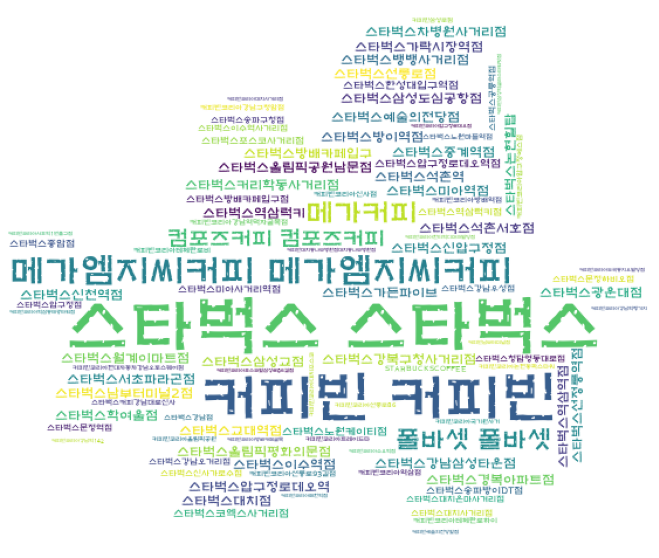

In [111]:
def displayWordCloud(mask,data = None, backgroundcolor = 'black', width=800, height=600):
    wordcloud = WordCloud(font_path="c:/Windows/Fonts/H2MKPB.ttf",
                         background_color = 'white',
                          width=1000,
                          height=500,
                          mask = mask,
                          max_words=100,
                          max_font_size=6000,
                         
                         ).generate_from_text(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
displayWordCloud(seoul_mask,' '.join(cafe_apt_pop['cafe_nm']))

In [112]:
cafe_apt_pop.columns

Index(['code', 'cafe_nm', 'gu_cd', 'gu_x', 'dong_cd', 'dong', 'gibun',
       'road_x', 'lng', 'lat', 'year', 'bus_cnt', 'HubName', 'HubDist',
       'gu_num', 'gu_y', 'size', 'trade', 'sizetrade', 'average_sizetrade',
       'road_y', 'pop', 'gu', 'pop_avg', 'cafe_cd'],
      dtype='object')

In [113]:
cafe_apt_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               1048 non-null   int64  
 1   cafe_nm            1048 non-null   object 
 2   gu_cd              1048 non-null   int64  
 3   gu_x               1048 non-null   object 
 4   dong_cd            1048 non-null   int64  
 5   dong               1048 non-null   object 
 6   gibun              1048 non-null   object 
 7   road_x             1048 non-null   object 
 8   lng                1048 non-null   float64
 9   lat                1048 non-null   float64
 10  year               1048 non-null   int64  
 11  bus_cnt            1048 non-null   int64  
 12  HubName            1048 non-null   object 
 13  HubDist            1048 non-null   float64
 14  gu_num             1048 non-null   float64
 15  gu_y               1048 non-null   object 
 16  size               1048 

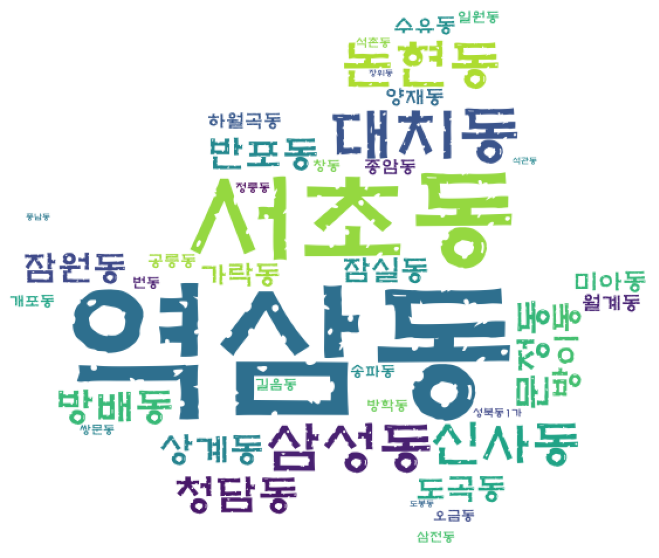

In [114]:
displayWordCloud(seoul_mask,' '.join(cafe_apt_pop['dong']))